In [1]:
import faiss # make faiss available
import numpy as np
import json
import random
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
image_paths=[]
with open("../geological_map.json", 'r', encoding='utf-8') as f:
    image_paths=json.load(f)
print(len(image_paths))

embedding = np.load("../geological_embed.npy")

29998


In [3]:
random_img_index=random.randint(0, len(image_paths)-1)
xq=embedding[random_img_index]
xb=embedding
print(xb.shape)
print(xq.shape)
xq=np.reshape(xq, (1, 576))
print(xq.shape)

(29998, 576)
(576,)
(1, 576)


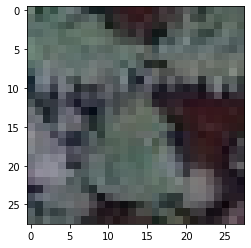

In [4]:
input_image_path=image_paths[random_img_index]
input_img = Image.open("../"+input_image_path).convert("RGB")
plt.imshow(input_img)
plt.show()

In [5]:
index = faiss.IndexFlatL2(576)# build the index
print(index.is_trained)
index.add(xb)                  # add vectors to the index
print(index.ntotal)
k=10
Dist, Indices = index.search(xq, k)     # actual search
print(Indices)                   # neighbors of the 5 first queries


True
29998
[[21399 22679 22413 22774 20838 22228 24329 21344 22672 23719]]


total indices:  10
geological_similarity\rhyolite\9W4QT.jpg


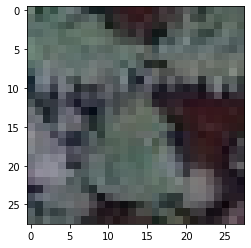

geological_similarity\rhyolite\J56HK.jpg


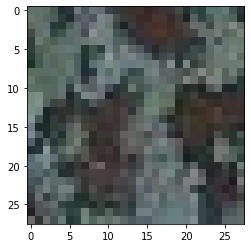

geological_similarity\rhyolite\HAI02.jpg


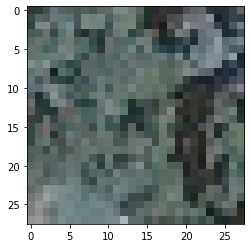

geological_similarity\rhyolite\JUGUB.jpg


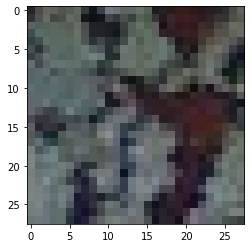

geological_similarity\rhyolite\5WP7H.jpg


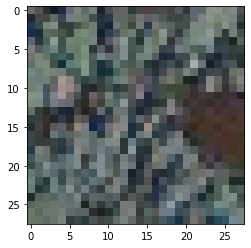

geological_similarity\rhyolite\FYCDJ.jpg


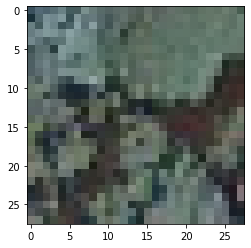

geological_similarity\rhyolite\V3ZB3.jpg


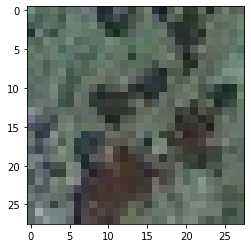

geological_similarity\rhyolite\9IZLF.jpg


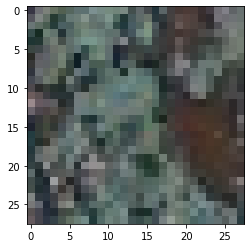

geological_similarity\rhyolite\J4CKF.jpg


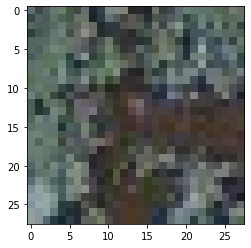

geological_similarity\rhyolite\QHANA.jpg


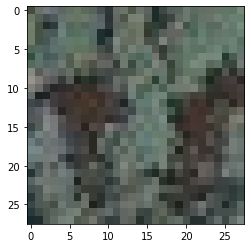

In [6]:
indices = Indices[0]
print("total indices: ", len(indices))
for index in indices:
    # img_name = str(index - 1) + ".jpg"
    # print(img_name)
    img_path = image_paths[index]
    print(img_path)
    img = Image.open("../"+img_path).convert("RGB")
    plt.imshow(img)
    plt.show()